In [10]:
import numpy as np
import pandas as pd

def generate_synthetic_dataset(num_samples=1000, random_seed=42):
    """
    Generates a synthetic dataset for health classification.

    Parameters:
        num_samples (int): Total number of samples to generate.
        random_seed (int): Seed for reproducibility.

    Returns:
        pd.DataFrame: A DataFrame containing SpO2, heart rate, and labels.
    """
    np.random.seed(random_seed)

    # Define ranges for different classes
    # Normal: SpO2 [95-100], Heart Rate [60-100]
    normal_spo2 = np.random.uniform(95, 100, num_samples // 3)
    normal_hr = np.random.uniform(60, 100, num_samples // 3)
    normal_labels = [0] * (num_samples // 3)

    # Mild Hypoxia: SpO2 [90-94], Heart Rate [70-110]
    mild_spo2 = np.random.uniform(90, 94, num_samples // 3)
    mild_hr = np.random.uniform(70, 110, num_samples // 3)
    mild_labels = [1] * (num_samples // 3)

    # Severe Hypoxia: SpO2 [85-89], Heart Rate [80-120]
    severe_spo2 = np.random.uniform(85, 89, num_samples // 3)
    severe_hr = np.random.uniform(80, 120, num_samples // 3)
    severe_labels = [2] * (num_samples // 3)

    # Combine all classes
    spo2 = np.concatenate([normal_spo2, mild_spo2, severe_spo2])
    hr = np.concatenate([normal_hr, mild_hr, severe_hr])
    labels = np.concatenate([normal_labels, mild_labels, severe_labels])

    # Shuffle the dataset
    indices = np.arange(num_samples)
    np.random.shuffle(indices)

    spo2 = spo2[indices]
    hr = hr[indices]
    labels = labels[indices]

    # Create a DataFrame
    data = {
        'SpO2': spo2,
        'Heart_Rate': hr,
        'Label': labels  # 0: Normal, 1: Mild Hypoxia, 2: Severe Hypoxia
    }

    return pd.DataFrame(data)

# Generate and save dataset
if __name__ == "__main__":
    # Generate synthetic dataset
    synthetic_data = generate_synthetic_dataset(num_samples=1500)

    # Save to CSV for later use
    synthetic_data.to_csv("synthetic_health_data.csv", index=False)
    print("Synthetic dataset generated and saved as 'synthetic_health_data-alexnet.csv'.")

    # Display a sample of the dataset
    print(synthetic_data.head())


Synthetic dataset generated and saved as 'synthetic_health_data-alexnet.csv'.
        SpO2  Heart_Rate  Label
0  86.974186  106.664019      2
1  95.909125   61.808747      0
2  87.583290   97.009127      2
3  85.138681   89.015251      2
4  85.093408  108.504853      2


Synthetic dataset generated and saved as 'synthetic_health_data.csv'.
        SpO2  Heart_Rate  Label
0  90.618102   86.335725    0.0
1  99.260715   83.542731    0.0
2  95.979909   51.794945    0.0
3  93.979877   73.887348    0.0
4  87.340280   76.613693    1.0


C:\Users\CHERRY\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Unique labels in dataset: [0. 1.]
Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6271 - loss: 0.9078 - val_accuracy: 0.9500 - val_loss: 0.3626
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9032 - loss: 0.3414 - val_accuracy: 0.9567 - val_loss: 0.1570
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9479 - loss: 0.1721 - val_accuracy: 0.9767 - val_loss: 0.0904
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9513 - loss: 0.1280 - val_accuracy: 0.9833 - val_loss: 0.0638
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9698 - loss: 0.0983 - val_accuracy: 0.9867 - val_loss: 0.0487
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9694 - loss: 0.0843 - val_accuracy: 0.9867 - val_loss: 0.0406
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9763 - loss: 0.0742 - val_accuracy: 0.9867 - val_loss: 0.0331
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9671 - loss: 0.0675

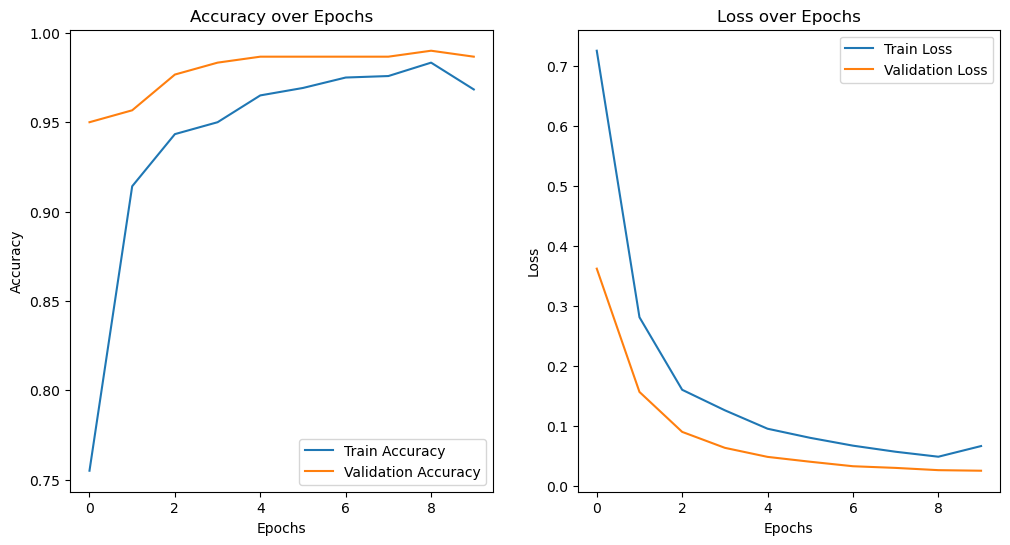

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


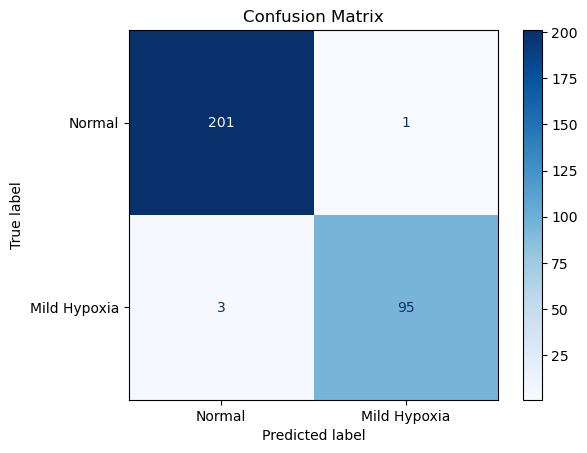


Classification Report:
              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99       202
Mild Hypoxia       0.99      0.97      0.98        98

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300

Enter the following values:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import pandas as pd

# Define a simple fully connected model
def build_fully_connected(input_shape, num_classes):
    """
    Builds a simple fully connected neural network to handle the input data.
    """
    model = Sequential([ 
        Dense(128, activation='relu', input_shape=input_shape), 
        Dropout(0.5), 
        Dense(64, activation='relu'), 
        Dropout(0.5), 
        Dense(num_classes, activation='softmax'),
    ]) 
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Plot accuracy and loss
def plot_history(history):
    """
    Plot the accuracy and loss curves from the training history.
    """
    plt.figure(figsize=(12, 6))
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Display confusion matrix and classification report
def evaluate_model(model, X_test, y_test, class_labels):
    """
    Evaluate the model and display confusion matrix and classification metrics.
    """
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred, labels=range(len(class_labels)))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # Classification Metrics
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

# User-defined input prediction
def predict_user_input(model, scaler, class_labels):
    """
    Accept user input and predict the condition.
    """
    print("Enter the following values:")
    try:
        spO2 = float(input("SpO2 (e.g., 95): "))
        heart_rate = float(input("Heart Rate (e.g., 75): "))
    except ValueError:
        print("Invalid input! Please enter numeric values.")
        return

    # Prepare input data
    input_data = np.array([[spO2, heart_rate]])
    input_data = scaler.transform(input_data)  # Normalize the input

    # Predict
    prediction = model.predict(input_data)
    predicted_class = np.argmax(prediction, axis=1)[0]
    print(f"\nPrediction: {class_labels[predicted_class]}")

# Generate synthetic dataset
def generate_synthetic_dataset(num_samples=1000):
    """
    Generates a synthetic dataset for health data with SpO2, Heart Rate, and labels.
    """
    np.random.seed(42)

    # SpO2: 85-100, Heart Rate: 50-120
    SpO2 = np.random.uniform(85, 100, num_samples)
    heart_rate = np.random.uniform(50, 120, num_samples)

    # Label generation (0: Normal, 1: Mild Hypoxia, 2: Severe Hypoxia)
    labels = np.zeros(num_samples)
    labels[(SpO2 < 90)] = 1  # Mild Hypoxia for SpO2 < 90
    labels[(SpO2 < 85)] = 2  # Severe Hypoxia for SpO2 < 85

    # Create DataFrame
    data = pd.DataFrame({
        'SpO2': SpO2,
        'Heart_Rate': heart_rate,
        'Label': labels
    })

    return data

# Main execution
if __name__ == "__main__":
    # Generate synthetic dataset and save to CSV
    synthetic_data = generate_synthetic_dataset(num_samples=1500)
    synthetic_data.to_csv("synthetic_health_data.csv", index=False)
    print("Synthetic dataset generated and saved as 'synthetic_health_data.csv'.")
    
    # Display a sample of the dataset
    print(synthetic_data.head())

    # Example parameters
    input_shape = (2,)  # Two features: SpO2 and Heart Rate
    num_classes = 3  # Example: Normal, Mild Hypoxia, Severe Hypoxia

    # Build fully connected model
    model = build_fully_connected(input_shape, num_classes)

    # Load synthetic data from CSV
    dataset = pd.read_csv("synthetic_health_data.csv")
    X = dataset[['SpO2', 'Heart_Rate']].values
    y = dataset['Label'].values

    # Scale the data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Convert labels to one-hot encoding
    y = to_categorical(y, num_classes)

    # Split the data into training and test sets
    X_train, X_test = X[:1200], X[1200:]
    y_train, y_test = y[:1200], y[1200:]

    # Check the number of unique labels in the dataset
    unique_labels = np.unique(y)
    print(f"Unique labels in dataset: {unique_labels}")

    # Ensure the class_labels matches the unique labels in the dataset
    if len(unique_labels) == 2:
        class_labels = ["Normal", "Mild Hypoxia"]
    else:
        class_labels = ["Normal", "Mild Hypoxia", "Severe Hypoxia"]

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

    # Plot accuracy and loss
    plot_history(history)

    # Evaluate the model
    evaluate_model(model, X_test, y_test, class_labels)

    # Predict user-defined input
    predict_user_input(model, scaler, class_labels)
